In [2]:
import pandas as pd
from pandas import Timestamp

vehicle_data = heagAPI.get_current_vehicle_data()
print(vehicle_data["timestamp"])

stations_data = heagAPI.get_station_data()

2024-11-01T12:44:48+0100


In [9]:
def getLatLong(station):
    return (station["latitude"], station["longitude"])

In [6]:
#filter out station far away from Darmstadt. way more performant -> uses distance attribute
max_distance = 20000 #in meters
stations_data_filtered = [station for station in stations_data if station["distance"] < max_distance]

In [7]:
def findClosestStation(location,stations):
    closest_station = None
    min_distance = float('inf')
    # assumes that stations_datat is sorted by distance
    distance_from_center = geodesic(location, getLatLong(stations_data[0])).meters
    distance_band_width = 3000

    for station in stations:
        if abs(distance_from_center - station["distance"]) < distance_band_width:
            distance = geodesic(location, getLatLong(station)).meters
            if distance < min_distance:
                min_distance = distance
                closest_station = station
    
    return closest_station

# What Tinas are in use

In [3]:
from heagVehicleLivedataUtils.vehicleDataUtils import countTramsByLineAndClass
from heagVehicleLivedataUtils.vehicleInformation import tram_class_prefix, modern_tram_numbers


In [4]:
# for compatibility after reworking vehicleUtils
def tramBaureihenPrefix(tram):
    return int(tram_class_prefix(tram))

def get_trams_by_line_and_class(trams):
    return countTramsByLineAndClass(trams)

In [10]:
#find the Tinas in use
tinas = [vehicle for vehicle in vehicle_data["vehicles"] if vehicle["category"]==1 and vehicle["vehicleId"] >= 100 and vehicle["vehicleId"] <= 125 ]

tinas.sort(key=lambda vehicle: vehicle["vehicleId"])

for tina in tinas:
    print(f'Tina 22{tina["vehicleId"]} on line {tina["lineId"]} towards \"{tina["direction"]}\" near \"{findClosestStation(getLatLong(tina),stations_data_filtered)["name"]}\"')

Tina 22102 on line 6 towards "Arheilgen Dreieichweg" near "Darmstadt-Eberstadt Frankenstein Haltest. Linie 7"
Tina 22104 on line 5 towards "Kranichstein Bahnhof" near "Darmstadt-Kranichstein Gruberstraße"
Tina 22106 on line 6 towards "Alsbach Am Hinkelstein" near "Darmstadt-Eberstadt Frankenstein"
Tina 22107 on line 9 towards "Griesheim Platz Bar-le-Duc" near "Darmstadt Luisenplatz"
Tina 22109 on line 6 towards "Arheilgen Dreieichweg" near "Darmstadt Luisenplatz"
Tina 22110 on line 6 towards "Alsbach Am Hinkelstein" near "Darmstadt-Arheilgen Dreieichweg"
Tina 22111 on line 9 towards "Darmstadt Böllenfalltor" near "Darmstadt TZ Rhein Main"
Tina 22113 on line 6 towards "Alsbach Am Hinkelstein" near "Darmstadt Pallaswiesenstraße"
Tina 22114 on line 6 towards "Arheilgen Dreieichweg" near "Darmstadt-Eberstadt Friedrich-Ebert-Straße"
Tina 22115 on line 6 towards "Alsbach Am Hinkelstein" near "Seeheim-Jugenheim-Seeheim Im Güldenen Wingert"
Tina 22116 on line 6 towards "Alsbach Am Hinkelstein"

In [77]:
trams = [vehicle for vehicle in vehicle_data["vehicles"] if vehicle["category"]==1]

trams.sort(key=lambda vehicle: vehicle["lineId"])
print(f'number of trams in use: {len(trams)}')
for tram in trams:
    # TODO: fix this to use vehicleUtils
    tramIdPrefixNumerical = tramBaureihenPrefix(tram)
    if tramIdPrefixNumerical > 22 :
        tramIdPrefix = ' ' + str(tramIdPrefixNumerical)
    elif tramIdPrefixNumerical == 22:
        tramIdPrefix = '22'
    elif tramIdPrefixNumerical == 7:
        tramIdPrefix = ' 07'
    else:
        tramIdPrefix = '  '

    print('Tram ' + tramIdPrefix + f'{tram["vehicleId"]} on line {tram["lineId"]} towards \"{tram["direction"]}\" near \"{findClosestStation(getLatLong(tram),stations_data_filtered)["name"]}\"')

number of trams in use: 33
Tram  9867 on line 3 towards "Darmstadt Hauptbahnhof" near "Darmstadt Willy-Brandt-Platz"
Tram  9871 on line 3 towards "Darmstadt Hauptbahnhof" near "Darmstadt Goethestraße"
Tram  0792 on line 3 towards "Darmstadt Lichtenbergschule" near "Darmstadt Weinbergstraße"
Tram  0786 on line 3 towards "Darmstadt Lichtenbergschule" near "Darmstadt Schulstraße"
Tram  9858 on line 3 towards "Darmstadt Lichtenbergschule" near "Darmstadt Hauptbahnhof"
Tram  0787 on line 4 towards "Kranichstein Bahnhof" near "Darmstadt Berliner Allee"
Tram  9873 on line 4 towards "Kranichstein Bahnhof" near "Darmstadt Rhönring"
Tram  0788 on line 4 towards "Darmstadt Hauptbahnhof" near "Darmstadt Willy-Brandt-Platz"
Tram  9869 on line 4 towards "Darmstadt Hauptbahnhof" near "Darmstadt-Kranichstein Bahnhof"
Tram  0789 on line 4 towards "Darmstadt Hauptbahnhof" near "Darmstadt-Kranichstein Bahnhof"
Tram  9860 on line 4 towards "Darmstadt Hauptbahnhof" near "Darmstadt-Kranichstein Borsdorffstr

In [36]:
trams = [vehicle for vehicle in vehicle_data["vehicles"] if vehicle["category"]==1]

trams_northSouth = [tram for tram in trams if (int(tram["lineId"]) >= 6 and int(tram["lineId"]) <= 8) or int(tram["lineId"]) == 1]
trams_northSouth_highFloor = [tram for tram in trams_northSouth if tram["vehicleId"] >= 15 and tram["vehicleId"] < 25]

print(f"number of high floor trams on eberstadt brach {len(trams_northSouth_highFloor)}/{len(trams_northSouth)}")

number of high floor trams on eberstadt brach 0/19


In [11]:
trams = [vehicle for vehicle in vehicle_data["vehicles"] if vehicle["category"]==1]

tramsOnLine_byClass = get_trams_by_line_and_class(trams)

for line in range(len(tramsOnLine_byClass)):
    print(f"{sum(tramsOnLine_byClass[line])} on line {line + 1} Distribution: {tramsOnLine_byClass[line]}")

print("Distribution: [ST15, ST14, ST13, ST12, other]")
print(f"Total: {len(trams)} Distribution: {[sum([tramsByClass[tramClass] for tramsByClass in tramsOnLine_byClass]) for tramClass in range(5)]}")

3 on line 1 Distribution: [0, 0, 3, 0, 0]
4 on line 2 Distribution: [0, 3, 1, 0, 0]
4 on line 3 Distribution: [0, 2, 2, 0, 0]
4 on line 4 Distribution: [0, 3, 1, 0, 0]
6 on line 5 Distribution: [1, 1, 2, 2, 0]
11 on line 6 Distribution: [8, 0, 1, 2, 0]
4 on line 7 Distribution: [0, 1, 3, 0, 0]
0 on line 8 Distribution: [0, 0, 0, 0, 0]
4 on line 9 Distribution: [2, 0, 1, 1, 0]
0 on line 10 Distribution: [0, 0, 0, 0, 0]
Distribution: [ST15, ST14, ST13, ST12, other]
Total: 40 Distribution: [11, 10, 14, 5, 0]


# Test stuff out

In [1]:
import heagVehicleLivedataUtils.apiUtils as heagAPI
vehicle_data = heagAPI.get_current_vehicle_data_as_dataframe()

In [2]:
vehicle_data[vehicle_data['status'] != 1]

lineid  category  \
time                      vehicleid                      
2024-12-28 18:26:36+01:00 616            693         5   
                          979        4352065         5   
                          656        5076545         5   

                                                  direction  status  \
time                      vehicleid                                   
2024-12-28 18:26:36+01:00 616        Fürth (Odenw.) Bahnhof       4   
                          979            Sickenhofen Kirche       4   
                          656        Rohrbach Brunnenstraße       4   

                                      latitude  longitude  bearing  type  
time                      vehicleid                                       
2024-12-28 18:26:36+01:00 616        49.648685   8.780912      225     1  
                          979        49.923916   9.011983      135     1  
                          656        49.864911   8.712122       90     1

### some options when plotting

In [8]:
from heagVehicleLivedataUtils.plot import DataAnalysis
from heagVehicleLivedataUtils.vehicleInformation import heagLineColormap

import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
vehicleDataPath = "../vehicleInfo/vehicleInfo_2024-10-02"
da = DataAnalysis(vehicledata_path=vehicleDataPath)

vehicle_in_service = da.get_trams_in_service()
vehicle_in_service.index = vehicle_in_service.index.strftime('%H:%M')

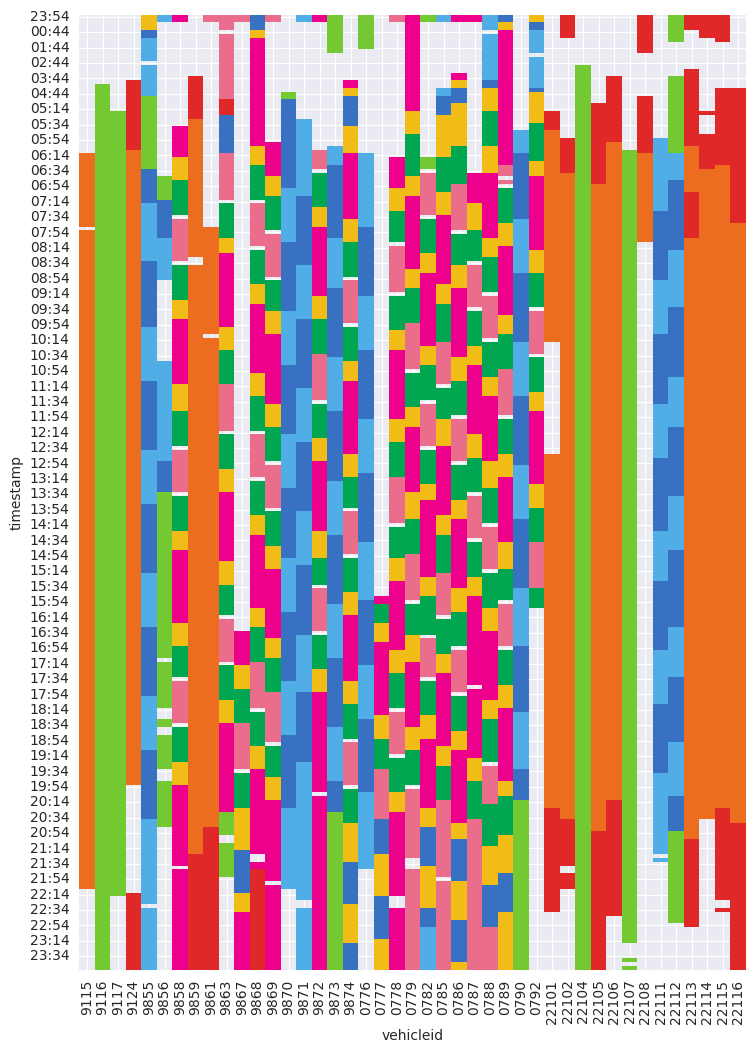

In [50]:
number_of_vehicles = vehicle_in_service.shape[1]
number_of_entries = vehicle_in_service.shape[0]

# TODO: what about differnt lenght of dataspec?? -> limited testing indactes that it does not change anython
plt.figure(figsize=(.2*number_of_vehicles, .05*number_of_entries))
#don't go lowe with width, otherwise labels will not be dispalyed
# mit faktor bei height können wir anpassen wie sehr zeit skaliert wird
#dpi does not help with clarity -> why would it, is only about rendering

sns.heatmap(vehicle_in_service, vmin=0, vmax=10, cmap=heagLineColormap, cbar=False) # dont want square, as we already do this via figsize

plt.show()